# Modelling

This notebook contains model training, data engineering and selection processes.



### Import Necessary Libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC


import timeit
import warnings
warnings.filterwarnings("ignore")

from functions import *

### Load dfs

In [89]:
# import libraries form csv files into pandas df
df = pd.read_csv('data_for_model.csv', usecols = ['review_rating' , 'Reviews_tokenize_join'])
df.head()

,review_rating,Reviews_tokenize_join
0,1,start say understand hard time city country en...
1,5,wonderful visit time park view thank upgrade l...
2,5,good hotel stay absolutely worth money view ce...
3,5,fantastic location spot step central park view...
4,5,amazing park view nicole staff professional fr...


In [3]:
# optimazation memory by converting the review_rating to category
df['target'] = df['review_rating'].astype('category')

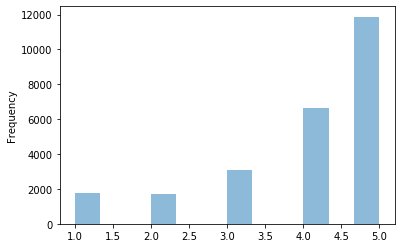

In [88]:
# plot
df['review_rating'].plot.hist(bins=12, alpha=0.5)

In [5]:

df['target'].value_counts(normalize = True)


5    0.474172
4    0.264351
3    0.122715
1    0.069501
2    0.069261
Name: target, dtype: float64

In [6]:
#df.info()
# df['target'] = df['review_rating'].apply(lambda x: str(x))

In [22]:
# df['target'] = df['review_rating'].astype('category')

In [7]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25050 entries, 0 to 25049
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   review_rating          25050 non-null  int64   
 1   Reviews_tokenize_join  25050 non-null  object  
 2   target                 25050 non-null  category
dtypes: category(1), int64(1), object(1)
memory usage: 416.2+ KB


,review_rating,Reviews_tokenize_join,target
0,1,start say understand hard time city country en...,1
1,5,wonderful visit time park view thank upgrade l...,5
2,5,good hotel stay absolutely worth money view ce...,5
3,5,fantastic location spot step central park view...,5
4,5,amazing park view nicole staff professional fr...,5


## Data Engineering and Modelling




I am going to implement different classifiers to see which works best:

- Logistic Regression
- Decision Tree
- Random Forest
- Linear Support Vector Classification
- Multinomial Naive Bayes

In [11]:
# def clf(model ,col1,col):
#     start = timeit.timeit()
#     """It takes two columns and a classifier, split the data into traing and testing, vectorize it, remove irrlevant features using and implemnt a ca
#     classifier using a pipeline, return a dictionary with accuracy, precions and recall f_1 socre and running time"""

#     X_train, X_test, y_train, y_test = train_test_split(df[col1], df[col] , test_size=0.3, random_state = 42)

#     classification_model = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
#                          ('chi',  SelectKBest(chi2, k=10000)),
#                    ('clf', model)])

#     classification_model.fit(X_train, y_train)
    
#     preds = classification_model.predict(X_test)
#     end = timeit.timeit()
#     final_time = start - end

#     list_names = ['Model','Accuracy_score','Recall_score','Precision_score','F1_score', 'Time']
#     score_list = []
#     accuracy = accuracy_score(y_test, preds)
#     recall = recall_score(y_test, preds,average=None, pos_label='Good')
#     precision = precision_score(y_test, preds,average=None, pos_label='Good')
#     f_1 = f1_score(y_test , preds,average=None, pos_label='Good')
#     final_time = start - end

#     score_list.extend([model,accuracy,recall,precision,f_1,final_time])
#     dictionary = dict(zip(list_names, score_list))
#     return dictionary

### Logistic Regresion 

In [6]:
lg_multi_class = clf(LogisticRegression() , df ,'Reviews_tokenize_join', 'target')


In [7]:
lg_multi_class

{'Accuracy_score': '60.0%',
 'Recall_score': array([0.54420432, 0.03214286, 0.24946004, 0.39164619, 0.90588235]),
 'Precision_score': array([0.57708333, 0.3       , 0.37806874, 0.47412255, 0.67414051]),
 'F1_score': array([0.56016178, 0.05806452, 0.30058556, 0.42895587, 0.77301665]),
 'Time': 0.0037921830000016143}

### Mutinomial NB

In [8]:
nb_multi_class = clf(MultinomialNB(), df, 'Reviews_tokenize_join', 'target')

In [9]:
nb_multi_class

{'Accuracy_score': '47.0%',
 'Recall_score': array([0.01178782, 0.        , 0.00647948, 0.03587224, 0.99827834]),
 'Precision_score': array([1.        , 0.        , 0.09230769, 0.11908646, 0.50929586]),
 'F1_score': array([0.02330097, 0.        , 0.01210898, 0.05513595, 0.67448623]),
 'Time': 0.0037687210000001414}

### Decision Tree Classifier

In [10]:
dt_multi_class = clf(DecisionTreeClassifier(), df, 'Reviews_tokenize_join', 'target')

In [11]:
dt_multi_class

{'Accuracy_score': '46.0%',
 'Recall_score': array([0.32612967, 0.14107143, 0.2300216 , 0.35724816, 0.64677188]),
 'Precision_score': array([0.38337182, 0.22253521, 0.23692992, 0.33641832, 0.61467139]),
 'F1_score': array([0.35244161, 0.1726776 , 0.23342466, 0.3465205 , 0.6303132 ]),
 'Time': 0.001065730000000542}

### AdaBoots

In [15]:
# clf(SGDClassifier())

In [16]:
# with cross validation
# clf(SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None))

In [17]:
# clf(SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None))

### Linear Support Vector Classification

In [12]:
svc_multi_class = clf(LinearSVC(),df, 'Reviews_tokenize_join', 'target')

In [13]:
svc_multi_class

{'Accuracy_score': '61.0%',
 'Recall_score': array([0.58742633, 0.14464286, 0.35529158, 0.40884521, 0.87058824]),
 'Precision_score': array([0.53680431, 0.34913793, 0.40220049, 0.49701314, 0.71658007]),
 'F1_score': array([0.56097561, 0.20454545, 0.37729358, 0.44863845, 0.78611219]),
 'Time': 0.00391733600000066}

### Random Forest Classifier

In [14]:
rf_multi_class = clf(RandomForestClassifier(),df, 'Reviews_tokenize_join', 'target')

In [17]:
rf_multi_class 

{'Accuracy_score': '52.0%',
 'Recall_score': array([0.30451866, 0.08928571, 0.18034557, 0.34643735, 0.8169297 ]),
 'Precision_score': array([0.46546547, 0.35460993, 0.29246935, 0.36471805, 0.62750716]),
 'F1_score': array([0.36817102, 0.14265335, 0.22311289, 0.35534274, 0.70979806]),
 'Time': 0.00047052500002564557}

### Results Summary


In [33]:
l= [lg_multi_class, dt_multi_class, nb_multi_class , svc_multi_class, rf_multi_class ]
df_results_multi = table_results(l)
df_results_multi.loc[: , ['Accuracy_score', 'Time']]

,Accuracy_score,Time
Model,,
Logistic Regresion,60.0%,0.003792
Decision Tree Classifier,46.0%,0.001066
Mutinomial NB,47.0%,0.003769
Linear Support Vector Classification,61.0%,0.003917
Random Forest Classifier,53.0%,0.003254


In [87]:
df_metrix_multi = unnest_df(df_results_multi)
df_metrix_multi

,Recall_score,Precision_score,F1_score,target_class,model
0,0.544204,0.577083,0.560162,1,Logistic Regresion
1,0.032143,0.300000,0.058065,2,Logistic Regresion
2,0.249460,0.378069,0.300586,3,Logistic Regresion
3,0.391646,0.474123,0.428956,4,Logistic Regresion
4,0.905882,0.674141,0.773017,5,Logistic Regresion
5,0.326130,0.383372,0.352442,1,Decision Tree Classifier
6,0.141071,0.222535,0.172678,2,Decision Tree Classifier
7,0.230022,0.236930,0.233425,3,Decision Tree Classifier
8,0.357248,0.336418,0.346520,4,Decision Tree Classifier
9,0.646772,0.614671,0.630313,5,Decision Tree Classifier


## Hyperparameters tunning in classifiers

### Logistic Regresion with GridSearchCV 

In [19]:
lg_multi_grid = clf_grid(LogisticRegression(),df ,'Reviews_tokenize_join', 'target',parameteres = {'clf__C':[0.01, 0.1, 1, 10, 100] })

In [20]:
lg_multi_grid

{'Accuracy_score': '61.0%',
 'Recall_score': array([0.5481336 , 0.15714286, 0.39416847, 0.42948403, 0.86054519]),
 'Precision_score': array([0.5625    , 0.34509804, 0.42491269, 0.50432776, 0.71883988]),
 'F1_score': array([0.55522388, 0.21595092, 0.40896359, 0.46390658, 0.78333551]),
 'Time': 0.0024522310000065772}

### Multinomial NB

In [21]:
nb_muti_grid = clf_grid(MultinomialNB(),df,'Reviews_tokenize_join', 'target', parameteres = {'clf__alpha': np.linspace(0.5, 1.5, 6), 'clf__fit_prior': [True, False]})

<IPython.core.display.Javascript object>

In [22]:
nb_muti_grid 

{'Accuracy_score': '60.0%',
 'Recall_score': array([0.3870334 , 0.0125    , 0.31533477, 0.45503686, 0.876901  ]),
 'Precision_score': array([0.63961039, 0.25      , 0.30575916, 0.46230654, 0.72399905]),
 'F1_score': array([0.48225214, 0.02380952, 0.31047315, 0.45864289, 0.7931482 ]),
 'Time': -0.0019864209999980176}

### Decision Tree Classifier

In [23]:
dt_multi_grid = clf_grid(DecisionTreeClassifier(),df,'Reviews_tokenize_join', 'target',parameteres = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 2, 3, 4, 5, 6],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 3, 4]
})

In [24]:
dt_multi_grid

{'Accuracy_score': '51.0%',
 'Recall_score': array([0.33005894, 0.00714286, 0.02159827, 0.21670762, 0.91305595]),
 'Precision_score': array([0.45901639, 0.44444444, 0.22988506, 0.35795455, 0.54664147]),
 'F1_score': array([0.384     , 0.01405975, 0.03948667, 0.26997245, 0.68385988]),
 'Time': 0.001961479999920357}

### Random Forest Classifier

In [28]:
rf_multi_grid = clf_grid(RandomForestClassifier(), df, 'Reviews_tokenize_join', 'target', parameteres = {
    'clf__n_estimators': [10, 30, 100],
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 2, 6, 10],
    'clf__min_samples_split': [5, 10],
    'clf__min_samples_leaf': [3, 6]
})

In [29]:
rf_multi_grid

{'Accuracy_score': '54.0%',
 'Recall_score': array([0.3280943 , 0.01607143, 0.10151188, 0.26683047, 0.94060258]),
 'Precision_score': array([0.59430605, 0.42857143, 0.28398792, 0.38924731, 0.59741206]),
 'F1_score': array([0.42278481, 0.03098107, 0.14956245, 0.31661808, 0.73071779]),
 'Time': 0.0018894189993261534}

### Linear Support Vector Classification 

In [26]:
svc_multi_grid = clf_grid(LinearSVC(),df, 'Reviews_tokenize_join', 'target' ,parameteres = {'clf__C':[0.001,0.1,10,100,10e5] ,'clf__max_iter':[1000 ,2000,3000]})

In [27]:
svc_multi_grid

{'Accuracy_score': '60.0%',
 'Recall_score': array([0.60707269, 0.04285714, 0.23218143, 0.36511057, 0.91994261]),
 'Precision_score': array([0.5459364 , 0.4       , 0.39814815, 0.47935484, 0.66805584]),
 'F1_score': array([0.57488372, 0.07741935, 0.29331514, 0.41450488, 0.77402221]),
 'Time': 0.001137792000463378}

### Results Summary


In [32]:
l= [lg_multi_grid, dt_multi_grid, nb_muti_grid  , svc_multi_grid, rf_multi_grid]
df_results_multi_grid = table_results(l)
df_results_multi_grid.loc[: , ['Accuracy_score', 'Time']]

,Accuracy_score,Time
Model,,
Logistic Regresion,61.0%,0.002452
Decision Tree Classifier,51.0%,0.001961
Mutinomial NB,60.0%,-0.001986
Linear Support Vector Classification,60.0%,0.001138
Random Forest Classifier,54.0%,0.001889


In [35]:
df_metrix_multi_grid = unnest_df(df_results_multi_grid)

In [36]:
df_metrix_multi_grid

,Recall_score,Precision_score,F1_score,target_class,model
0,0.548134,0.562500,0.555224,1,Logistic Regresion
1,0.157143,0.345098,0.215951,2,Logistic Regresion
2,0.394168,0.424913,0.408964,3,Logistic Regresion
3,0.429484,0.504328,0.463907,4,Logistic Regresion
4,0.860545,0.718840,0.783336,5,Logistic Regresion
5,0.330059,0.459016,0.384000,1,Decision Tree Classifier
6,0.007143,0.444444,0.014060,2,Decision Tree Classifier
7,0.021598,0.229885,0.039487,3,Decision Tree Classifier
8,0.216708,0.357955,0.269972,4,Decision Tree Classifier
9,0.913056,0.546641,0.683860,5,Decision Tree Classifier


## Change target to 3 categories


First model needs to be improved.
There are a lot more 4, 5 stars than 1, 2, 3 stars,
Set 1, 2, 3 stars to 'Bad', 4 stars to 'Neutral', 5 stars to 'Good'

In [37]:
# df_tree_categories = df.replace({5: 'good', 4: 'neutral', 3: 'bad' , 2: 'bad', 1: 'bad'})
# df_tree_categories.head()
df['tri_target'] = 'Bad'
df.loc[df['review_rating'] == 5, 'tri_target'] = 'Good'
df.loc[df['review_rating'] == 4, 'tri_target'] = 'Neutral'

In [38]:
df['tri_target'].value_counts()

Good       11878
Neutral     6622
Bad         6550
Name: tri_target, dtype: int64

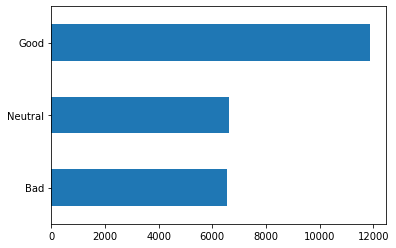

In [39]:
# df_tree_categories['target'].plot.bar(bins=12, alpha=0.5)
df['tri_target'].value_counts().sort_values().plot(kind = 'barh')


###  Logistic Regressiom

In [40]:
ld_tri_class = clf( LogisticRegression(),df, 'Reviews_tokenize_join', 'tri_target')


In [41]:
ld_tri_class 

{'Accuracy_score': '72.0%',
 'Recall_score': array([0.81954887, 0.88579627, 0.32432432]),
 'Precision_score': array([0.80225711, 0.71491431, 0.56945643]),
 'F1_score': array([0.81081081, 0.79123414, 0.41327489]),
 'Time': 0.0008785369996076042}

### Decision Tree Classifier

In [42]:
dt_tri_class = clf(DecisionTreeClassifier(),df, 'Reviews_tokenize_join', 'tri_target')

In [43]:
dt_tri_class

{'Accuracy_score': '53.0%',
 'Recall_score': array([0.50726817, 0.66025825, 0.33808354]),
 'Precision_score': array([0.60273973, 0.61409127, 0.32934418]),
 'F1_score': array([0.5508982 , 0.6363385 , 0.33365664]),
 'Time': 0.002455901000303129}

### Mutinomial NB

In [44]:
nb_tri_class = clf(MultinomialNB(),df,'Reviews_tokenize_join', 'tri_target')

In [45]:
nb_tri_class

{'Accuracy_score': '65.0%',
 'Recall_score': array([0.68120301, 0.98479197, 0.05995086]),
 'Precision_score': array([0.87283237, 0.60210526, 0.47286822]),
 'F1_score': array([0.7652027 , 0.74730539, 0.10641082]),
 'Time': -0.005167268000150216}

### Linear Support Vector Machine with stochastic gradient descent (SGD)


In [46]:
sgd_tri_class= clf(SGDClassifier(),df, 'Reviews_tokenize_join', 'tri_target')

### Linear Support Vector Classification

In [47]:
svc_tri_class = clf(LinearSVC(), df,'Reviews_tokenize_join', 'tri_target')

In [ ]:
svc_tri_class

### Random Forest Classifier

In [48]:
rf_tri_class = clf(RandomForestClassifier(),df, 'Reviews_tokenize_join', 'tri_target')

In [ ]:
rf_tri_class

### Results Summary


In [50]:
l= [ld_tri_class, dt_tri_class, nb_tri_class , svc_tri_class, rf_tri_class ]
df_results_tri = table_results(l)
df_results_tri.loc[: , ['Accuracy_score', 'Time']]

,Accuracy_score,Time
Model,,
Logistic Regresion,72.0%,0.000879
Decision Tree Classifier,53.0%,0.002456
Mutinomial NB,65.0%,-0.005167
Linear Support Vector Classification,71.0%,0.004208
Random Forest Classifier,62.0%,0.004849


In [51]:
df_metrix_tri = unnest_df(df_results_tri)

## Tunning hyperparameters

### Loigistic Regression

In [52]:
lg_tri_grid = clf_grid(LogisticRegression(),df,'Reviews_tokenize_join', 'tri_target', parameteres ={'clf__penalty' : ['l1', 'l2'],
'clf__C' : [ 0.001, 0.01, 0.1, 1, 10, 100],
'clf__solver': ['liblinear', 'saga']})

### Decision Tree Classifier

In [54]:
dt_tri_grid = clf_grid( DecisionTreeClassifier(),df,'Reviews_tokenize_join', 'tri_target', parameteres = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 2, 3, 4, 5, 6],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 3, 4, 5, 6]
})

### Multinomial NB

In [53]:
nb_tri_grid = clf_grid( MultinomialNB(), df,'Reviews_tokenize_join', 'tri_target', parameteres = {'clf__alpha': np.linspace(0.5, 1.5, 6), 'clf__fit_prior': [True, False]})

<IPython.core.display.Javascript object>

### Linear Support Vector Classification

In [55]:
svc_tri_grid = clf_grid( LinearSVC() ,df, 'Reviews_tokenize_join', 'tri_target',parameteres = {'clf__C':[0.001,0.1,10,100,10e5], 'clf__max_iter':[1000, 2000,3000]})


### Random Forest Classifier

In [56]:
rf_tri_grid = clf_grid( RandomForestClassifier(), df,'Reviews_tokenize_join', 'tri_target', parameteres = {
    'clf__n_estimators': [10, 30, 100],
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 2, 6, 10],
    'clf__min_samples_split': [5, 10],
    'clf__min_samples_leaf': [3, 6]
})

### Results Summary


In [57]:
l= [lg_tri_grid, dt_tri_grid, nb_muti_grid, svc_tri_grid, rf_tri_grid]
df_results_tri_grid = table_results(l)
df_results_tri_grid.loc[: , ['Accuracy_score', 'Time']]

,Accuracy_score,Time
Model,,
Logistic Regresion,60.0%,0.003124
Decision Tree Classifier,45.0%,0.000234
Mutinomial NB,60.0%,-0.001986
Linear Support Vector Classification,60.0%,0.002320
Random Forest Classifier,55.00000000000001%,-0.002354


In [58]:
df_metrix_tri_grid = unnest_df(df_results_tri_grid)

## Change target to 2 categories


The last model is not bad but I think It can improve if I implement binary classification.
Divide the df into 5 stars as Good and the rest as Bad.

In [64]:
df['bi_target'] = 'Bad'
df.loc[df['review_rating'] == 5, 'bi_target'] = 'Good'


,review_rating,Reviews_tokenize_join,target,tri_target,bi_target
0,1,start say understand hard time city country en...,1,Bad,Bad
1,5,wonderful visit time park view thank upgrade l...,5,Good,Good
2,5,good hotel stay absolutely worth money view ce...,5,Good,Good
3,5,fantastic location spot step central park view...,5,Good,Good
4,5,amazing park view nicole staff professional fr...,5,Good,Good


In [65]:
df.bi_target.value_counts(normalize = True)
df.head()

,review_rating,Reviews_tokenize_join,target,tri_target,bi_target
0,1,start say understand hard time city country en...,1,Bad,Bad
1,5,wonderful visit time park view thank upgrade l...,5,Good,Good
2,5,good hotel stay absolutely worth money view ce...,5,Good,Good
3,5,fantastic location spot step central park view...,5,Good,Good
4,5,amazing park view nicole staff professional fr...,5,Good,Good


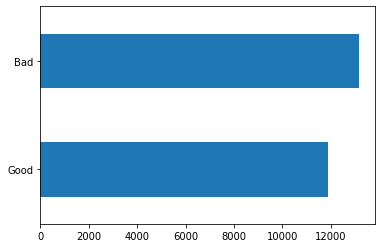

In [66]:
df['bi_target'].value_counts().sort_values().plot(kind = 'barh')


## Data Engineering and Modelling


### Logistic Regression

In [67]:
lg_bi_class = clf(LogisticRegression(),df, 'Reviews_tokenize_join', 'bi_target')

In [ ]:
lg_bi_class

### Decision Tree Classifier

In [70]:
dt_bi_class = clf(DecisionTreeClassifier(),df,  'Reviews_tokenize_join', 'bi_target')

In [ ]:
dt_bi_class

### Multinoial NB

In [71]:
nb_bi_class = clf(MultinomialNB(),df,  'Reviews_tokenize_join', 'bi_target')

In [ ]:
nb_bi_class

In [271]:
# sgd_bi_class = clf(SGDClassifier(),df,  'Reviews_tokenize_join', 'bi_target')

Classier:SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) , Time: 0.0029596269960165955
Accuracy: 80.56
              precision    recall  f1-score   support

         Bad       0.84      0.79      0.81      4030
        Good       0.77      0.82      0.80      3485

    accuracy                           0.81      7515
   macro avg       0.81      0.81      0.81      7515
weighted avg       0.81      0.81      0.81      7515



In [ ]:
sgd_bi_class 

### Linear Support Vector Classification

In [73]:
svc_bi_class = clf(LinearSVC(),df, 'Reviews_tokenize_join', 'bi_target')

In [ ]:
svc_bi_class

### Random Forest Classifier

In [75]:
rf_bi_class = clf( RandomForestClassifier(),df, 'Reviews_tokenize_join', 'bi_target')

In [ ]:
rf_bi_class

### Results Summary


In [76]:
l= [lg_bi_class, dt_bi_class, nb_bi_class , svc_bi_class, rf_bi_class ]
df_results_bi = table_results(l)
df_results_bi.loc[: , ['Accuracy_score', 'Time']]

,Accuracy_score,Time
Model,,
Logistic Regresion,80.0%,-0.000550
Decision Tree Classifier,65.0%,0.001817
Mutinomial NB,80.0%,-0.005196
Linear Support Vector Classification,81.0%,0.003674
Random Forest Classifier,73.0%,0.002446


In [82]:
df_metrix_bi = unnest_df(df_results_bi)

## Tunning hyperparameters

### Logistic Regression

In [79]:
lg_bi_grid = clf_grid(LogisticRegression(),df,'Reviews_tokenize_join', 'bi_target', parameteres ={'clf__penalty' : ['l1', 'l2'],
'clf__C' : [ 0.001, 0.01, 0.1, 1, 10, 100],
'clf__solver': ['liblinear', 'saga']})

In [ ]:
lg_bi_grid

### Decision Tree Classifier

In [80]:
dt_bi_grid = clf_grid( DecisionTreeClassifier(),df, 'Reviews_tokenize_join', 'bi_target', parameteres = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 2, 3, 4, 5, 6],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 3, 4, 5, 6]
})

In [ ]:
dt_bi_grid

### Multinomial NB

In [81]:
nb_bi_grid = clf_grid( MultinomialNB(),df,'Reviews_tokenize_join', 'bi_target', parameteres = {'clf__alpha': np.linspace(0.5, 1.5, 6), 'clf__fit_prior': [True, False]})

<IPython.core.display.Javascript object>

In [ ]:
nb_bi_grid 

### Linear Support Vector Classification

In [83]:
svc_bi_grid = clf_grid( LinearSVC() ,df, 'Reviews_tokenize_join', 'bi_target',parameteres = {'clf__C':[0.001,0.1,10,100,10e5], 'clf__max_iter':[1000, 2000,3000]})
                                                                                                       


In [ ]:
svc_bi_grid

### Random Forest Classifier

In [ ]:
rf_bi_grid = clf_grid( RandomForestClassifier(),df, 'Reviews_tokenize_join', 'bi_target', parameteres = {
#     'clf__n_estimators': [10, 30, 100],
#     'clf__criterion': ['gini', 'entropy'],
#     'clf__max_depth': [None, 2, 6, 10],
#     'clf__min_samples_split': [5, 10],
#     'clf__min_samples_leaf': [3, 6]
# })

In [85]:
rf_bi_grid = clf_grid( RandomForestClassifier(),df, 'Reviews_tokenize_join', 'bi_target', parameteres = {
     'clf__n_estimators': [10, 30, 100]})

In [ ]:
rf_bi_grid

### Results Summary


In [86]:
l= [lg_bi_grid, dt_bi_grid, nb_bi_grid, svc_bi_grid, rf_bi_grid]
df_results_bi_grid = table_results(l)
df_results_bi_grid.loc[: , ['Accuracy_score', 'Time']]

,Accuracy_score,Time
Model,,
Logistic Regresion,61.0%,0.003424
Decision Tree Classifier,46.0%,0.002859
Mutinomial NB,60.0%,0.002448
Linear Support Vector Classification,60.0%,0.002693
Random Forest Classifier,54.0%,0.003753


In [ ]:
df_metrix_bi_grid = unnest_df(df_results_bi)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Reviews_tokenize_join'] ,df['target'], test_size=0.3, random_state = 42)

pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
                     ('chi',  SelectKBest(chi2, k=10000)),
                     ('clf', LinearSVC())])

In [87]:
parameteres = {'clf__C':[0.001,0.1,10,100,10e5], 'clf__max_iter':[1000, 2000,3000]}

In [88]:
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)


In [89]:
grid.fit(X_train, y_train)


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                          

In [90]:
print(grid.score(X_test,y_test))

0.6217564870259481


In [91]:
grid.best_params_

{'clf__C': 0.1, 'clf__max_iter': 1000}

In [92]:
clf(LinearSVC(C=0.1, penalty='l1', max_iter=1000, dual=False))

<IPython.core.display.Javascript object>

Mean Cross Validation Score: 56.49%
Classier:LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
          verbose=0) , Time: 0.0035134449990437133
Accuracy: 0.5720558882235529
              precision    recall  f1-score   support

           1       0.52      0.49      0.50       509
           2       0.33      0.03      0.05       560
           3       0.35      0.12      0.17       926
           4       0.42      0.35      0.38      2035
           5       0.65      0.92      0.76      3485

    accuracy                           0.57      7515
   macro avg       0.45      0.38      0.37      7515
weighted avg       0.52      0.57      0.51      7515



In [93]:
clf(LinearSVC(C=0.1, max_iter=1000))

<IPython.core.display.Javascript object>

Mean Cross Validation Score: 59.54%
Classier:LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0) , Time: 0.004986515999917174
Accuracy: 0.5984031936127745
              precision    recall  f1-score   support

           1       0.55      0.61      0.57       509
           2       0.40      0.04      0.08       560
           3       0.40      0.23      0.29       926
           4       0.48      0.37      0.41      2035
           5       0.67      0.92      0.77      3485

    accuracy                           0.60      7515
   macro avg       0.50      0.43      0.43      7515
weighted avg       0.56      0.60      0.55      7515



In [94]:
clf(LinearSVC())

<IPython.core.display.Javascript object>

Mean Cross Validation Score: 60.98%
Classier:LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0) , Time: 0.006638550999923609
Accuracy: 0.6087824351297405
              precision    recall  f1-score   support

           1       0.54      0.59      0.56       509
           2       0.35      0.14      0.20       560
           3       0.40      0.36      0.38       926
           4       0.50      0.41      0.45      2035
           5       0.72      0.87      0.79      3485

    accuracy                           0.61      7515
   macro avg       0.50      0.47      0.48      7515
weighted avg       0.58      0.61      0.59      7515



In [8]:
model = pipeline.fit(X_train, y_train)


In [9]:
print("accuracy score: " + str(model.score(X_test, y_test)))


accuracy score: 0.6171656686626746


In [13]:
vectorizer = model.named_steps['vect']
chi = model.named_steps['chi']
clf = model.named_steps['classifier']


In [17]:

feature_names = vectorizer.get_feature_names()
feature_names = [feature_names[i] for i in chi.get_support(indices=True)]
feature_names = np.asarray(feature_names)
feature_names[:10]

<IPython.core.display.Javascript object>

array(['aand price', 'able coffee', 'able comfortable', 'able complain',
       'able cook', 'able manually', 'able rebook', 'able suitcase',
       'able text', 'able toilet'], dtype='<U28')

In [15]:
target_names = ['1', '2', '3', '4', '5']
print("top 10 keywords per class:")
for i, label in enumerate(target_names):
    top10 = np.argsort(clf.coef_[i])[-10:]
    print("%s: %s" % (label, " ".join(feature_names[top10])))

top 10 keywords per class:


<IPython.core.display.Javascript object>

1: total cost horrible ruin uncleaned experience superb avoid cost stay away disgusting bed uncomfortable bad


<IPython.core.display.Javascript object>

2: work leak sink didn book site like hadn rudest shoddy wasn worth soil feel dirty maze


<IPython.core.display.Javascript object>

3: room rude average average experience worth lobby date staff tall building pro despite request problem need leave floor


<IPython.core.display.Javascript object>

4: attend opera lobby large good reasonable overall location downside reason didn simple clean excellent right general good drawback


<IPython.core.display.Javascript object>

5: perfect love worth penny andrew grateful absolutely stay emanuel exceed impressed overall excellent


In [ ]:
## limpiar la data quetar names como did